### Importing Important Libraries 

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.pyplot import figure

In [2]:
os.chdir("C:\\Users\\Priya Sharma\\OneDrive\\Desktop\\Python Work\\Models by me\\Logistic Regression")
full=pd.read_csv("Social_Network_Ads.csv")

In [3]:
full.drop(["User ID"],axis=1,inplace=True)
full.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
trainDf, testDf = train_test_split(full, train_size=0.7, random_state = 123)

In [5]:
trainDf['Source'] = 'Train'
testDf['Source'] = 'Test'

In [6]:
full=pd.concat([trainDf, testDf], axis = 0)
full.shape

(400, 5)

In [7]:
full.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
Source             0
dtype: int64

In [8]:
full.loc[full['Source'] == 'Train', 'Purchased'].value_counts()/ full[full['Source'] == 'Train'].shape[0]

0    0.642857
1    0.357143
Name: Purchased, dtype: float64

In [9]:
full.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
Source             object
dtype: object

In [10]:
trainDf = full.loc[full['Source'] == 'Train']
continuousVars = trainDf.columns[trainDf.dtypes != object]
continuousVars

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## Exploratory Data Analysis

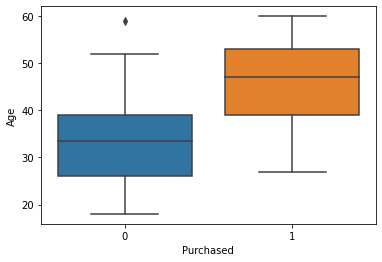

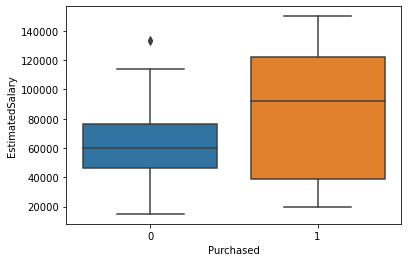

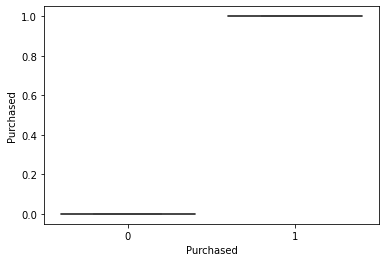

In [11]:
for colNumber, colName in enumerate(continuousVars): # enumerate gives key, value pair
    # print(colNumber, colName)
    figure()
    sns.boxplot(y = trainDf[colName], x = trainDf["Purchased"])

In [12]:
categoricalVars = trainDf.columns[trainDf.dtypes == object]
categoricalVars

Index(['Gender', 'Source'], dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='Probability'>

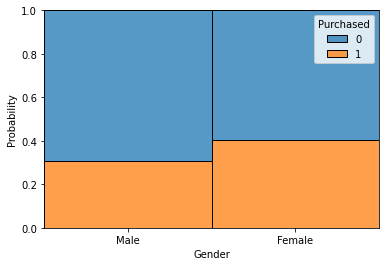

In [13]:
sns.histplot(trainDf, x="Gender", hue="Purchased", stat="probability", multiple="fill")

In [14]:
full2 = pd.get_dummies(full, drop_first = True) # 'Source'  column will change to 'Source_Train' and it contains 0s and 1s
full2.shape

(400, 5)

In [15]:
Train = full2[full2['Source_Train'] == 1].drop(['Source_Train'], axis = 1).copy()
Test = full2[full2['Source_Train'] == 0].drop(['Source_Train'], axis = 1).copy()

In [16]:
depVar = "Purchased"
trainX = Train.drop([depVar], axis = 1).copy()
trainY = Train[depVar].copy()
testX = Test.drop([depVar], axis = 1).copy()
testY = Test[depVar].copy()

In [17]:
trainX.shape

(280, 3)

In [18]:
testX.shape

(120, 3)

In [19]:
from statsmodels.api import add_constant
trainX = add_constant(trainX)
testX = add_constant(testX)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Logistic Regression

In [20]:
from statsmodels.api import Logit  
M1 = Logit(trainY, trainX) # (Dep_Var, Indep_Vars) # This is model definition
M1_Model = M1.fit() # This is model building
M1_Model.summary()

Optimization terminated successfully.
         Current function value: 0.352097
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Apr 2022   Pseudo R-squ.:                  0.4598
Time:                        15:15:05   Log-Likelihood:                -98.587
converged:                       True   LL-Null:                       -182.49
Covariance Type:            nonrobust   LLR p-value:                 3.781e-36
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.4974      1.621     -7.709      0.000     -15.675      -9.320
Age                 0.2321      0.031      7.374      0.000       0.170       0.294
EstimatedSalary  3.713e-05   6.64e-06      5.588      0.000    2.41e-05    5.02e-05
Gender_Male         0.2009      0.361      0.557      0.578      -0.506       0.908
===================================================================================
"""

In [21]:
Cols_To_Drop = ["Gender_Male"]
M2 = Logit(trainY, trainX.drop(Cols_To_Drop, axis = 1)).fit() # (Dep_Var, Indep_Vars)
M2.summary()

Optimization terminated successfully.
         Current function value: 0.352653
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      277
Method:                           MLE   Df Model:                            2
Date:                Tue, 12 Apr 2022   Pseudo R-squ.:                  0.4589
Time:                        15:15:05   Log-Likelihood:                -98.743
converged:                       True   LL-Null:                       -182.49
Covariance Type:            nonrobust   LLR p-value:                 4.249e-37
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.2655      1.551     -7.908      0.000     -15.305      -9.226
Age                 0.2297      0.031      7.420      0.000       0.169       0.290
EstimatedSalary  3.664e-05   6.57e-06      5.577      0.000    2.38e-05    4.95e-05
===================================================================================
"""

In [22]:
trainX = trainX.drop(Cols_To_Drop, axis = 1)
testX = testX.drop(Cols_To_Drop, axis = 1)

In [23]:
testX['Test_Prob'] = M2.predict(testX) 
testX.columns # A new column called Test_Prob should be created
testX['Test_Prob'][0:10]
testY[:10]

234    0
42     0
303    1
155    0
342    0
309    0
54     0
287    1
378    1
91     0
Name: Purchased, dtype: int64

In [24]:
testX['Test_Class'] = np.where(testX['Test_Prob'] >= 0.5, 1, 0)
testX.columns 

Index(['const', 'Age', 'EstimatedSalary', 'Test_Prob', 'Test_Class'], dtype='object')

In [25]:
Confusion_Mat = pd.crosstab(testX['Test_Class'], testY) # R, C format
Confusion_Mat

Purchased,0,1
Test_Class,,
0,69,10
1,8,33


In [26]:
from sklearn.metrics import classification_report
print(classification_report(testY, testX['Test_Class']))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        77
           1       0.80      0.77      0.79        43

    accuracy                           0.85       120
   macro avg       0.84      0.83      0.84       120
weighted avg       0.85      0.85      0.85       120



## Decision Tree

In [3]:
os.chdir("C:\\Users\\Priya Sharma\\OneDrive\\Desktop\\Python Work\\Models by me\\Logistic Regression")
full3=pd.read_csv("Social_Network_Ads.csv")

In [4]:
full3.drop(["User ID"],axis=1,inplace=True)
full3.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
trainDf1, testDf1 = train_test_split(full3, train_size=0.7, random_state = 123)

In [6]:
trainDf1['Source'] = 'Train'
testDf1['Source'] = 'Test'

In [7]:
full3=pd.concat([trainDf1, testDf1], axis = 0)
full3.shape

(400, 5)

In [8]:
full3 = pd.get_dummies(full3, drop_first = True) # 'Source'  column will change to 'Source_Train' and it contains 0s and 1s
full3.shape

(400, 5)

In [9]:
Train2 = full3[full3['Source_Train'] == 1].drop(['Source_Train'], axis = 1).copy()
Test2 = full3[full3['Source_Train'] == 0].drop(['Source_Train'], axis = 1).copy()

In [10]:
depVar2 = "Purchased"
trainX1 = Train2.drop([depVar2], axis = 1).copy()
trainY1 = Train2[depVar2].copy()
testX1 = Test2.drop([depVar2], axis = 1).copy()
testY1 = Test2[depVar2].copy()

In [11]:
from statsmodels.api import add_constant
trainX1 = add_constant(trainX1)
testX1 = add_constant(testX1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
Cols_To_Drop1 = ["Gender_Male"]

In [13]:
trainX1 = trainX1.drop(Cols_To_Drop1, axis = 1)
testX1 = testX1.drop(Cols_To_Drop1, axis = 1)

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.pyplot import figure, savefig, close
from sklearn.metrics import mean_absolute_percentage_error

In [15]:
M3 = DecisionTreeClassifier(random_state = 123).fit(trainX1, trainY1)

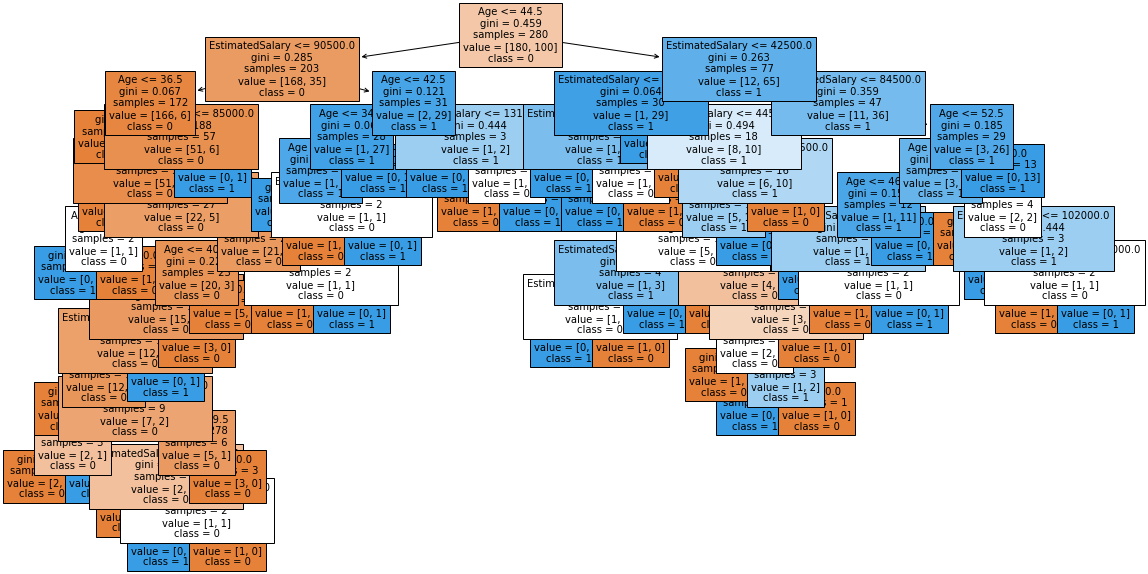

In [40]:
figure(figsize = [20, 10])
DT_Plot1 = plot_tree(M3, fontsize = 10, feature_names = trainX1.columns, 
                     filled = True, class_names = ["0","1"])

In [16]:
Test_Pred2 = M3.predict(testX1)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(testY1, Test_Pred2))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        77
           1       0.79      0.88      0.84        43

    accuracy                           0.88       120
   macro avg       0.86      0.88      0.87       120
weighted avg       0.88      0.88      0.88       120



## RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
n_estimators = [50,100,128,200]
max_features = [2,3,4,5]
bootstrap = [True,False]
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [53]:
rf = RandomForestClassifier()

In [54]:
grid = GridSearchCV(rf,param_grid)

In [55]:
grid.fit(trainX1,trainY1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\j

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 128, 200]})

In [56]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [57]:
predictions = grid.predict(testX1)

In [58]:
print(classification_report(testY1,predictions))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        77
           1       0.81      0.88      0.84        43

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120



## Support Vector Classifier

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [21]:
M6 = SVC()
M6_Model = M6.fit(trainX1, trainY1) 

In [22]:
Test_Class4 = M6_Model.predict(testX1)
print(classification_report(testY1, Test_Class4))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        77
           1       0.71      0.40      0.51        43

    accuracy                           0.73       120
   macro avg       0.72      0.65      0.66       120
weighted avg       0.72      0.72      0.70       120

